In [1]:
import pandas as pd


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/KeithGalli/lego-analysis/master/datasets/lego_sets.csv')
parent_theme = pd.read_csv('https://raw.githubusercontent.com/KeithGalli/lego-analysis/master/datasets/parent_themes.csv')

In [3]:
df.head(5)

,set_num,name,year,num_parts,theme_name,parent_theme
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland
1,0011-2,Town Mini-Figures,1978,NaN,Supplemental,Town
2,0011-3,Castle 2 for 1 Bonus Offer,1987,NaN,Lion Knights,Castle
3,0012-1,Space Mini-Figures,1979,12.0,Supplemental,Space
4,0013-1,Space Mini-Figures,1979,12.0,Supplemental,Space


In [4]:
parent_theme.head(5)

,id,name,is_licensed
0,1,Technic,False
1,22,Creator,False
2,50,Town,False
3,112,Racers,False
4,126,Space,False


# What percent of starwar themed where released

In [8]:
newdf = df.merge(parent_theme, left_on='parent_theme', right_on='name')

In [9]:
newdf

,set_num,name_x,year,num_parts,theme_name,parent_theme,id,name_y,is_licensed
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland,411,Legoland,False
1,00-2,Weetabix Promotional House 1,1976,NaN,Building,Legoland,411,Legoland,False
2,00-3,Weetabix Promotional House 2,1976,NaN,Building,Legoland,411,Legoland,False
3,00-4,Weetabix Promotional Windmill,1976,126.0,Building,Legoland,411,Legoland,False
4,00-7,Weetabix Promotional Lego Village,1976,NaN,Building,Legoland,411,Legoland,False
...,...,...,...,...,...,...,...,...,...
11981,8410-1,Swampfire,2010,22.0,Ben 10,Ben 10,270,Ben 10,True
11982,8411-1,ChromaStone,2010,21.0,Ben 10,Ben 10,270,Ben 10,True
11983,8517-1,Humungousaur,2010,14.0,Ben 10,Ben 10,270,Ben 10,True
11984,8518-1,Jet Ray,2010,NaN,Ben 10,Ben 10,270,Ben 10,True


In [10]:
newdf=newdf.drop(columns='name_y')

In [11]:
newdf

,set_num,name_x,year,num_parts,theme_name,parent_theme,id,is_licensed
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland,411,False
1,00-2,Weetabix Promotional House 1,1976,NaN,Building,Legoland,411,False
2,00-3,Weetabix Promotional House 2,1976,NaN,Building,Legoland,411,False
3,00-4,Weetabix Promotional Windmill,1976,126.0,Building,Legoland,411,False
4,00-7,Weetabix Promotional Lego Village,1976,NaN,Building,Legoland,411,False
...,...,...,...,...,...,...,...,...
11981,8410-1,Swampfire,2010,22.0,Ben 10,Ben 10,270,True
11982,8411-1,ChromaStone,2010,21.0,Ben 10,Ben 10,270,True
11983,8517-1,Humungousaur,2010,14.0,Ben 10,Ben 10,270,True
11984,8518-1,Jet Ray,2010,NaN,Ben 10,Ben 10,270,True


In [40]:
licensed = newdf[newdf['is_licensed']]
licensed = licensed.dropna(subset=['set_num'])
licensed.head()
star_war = licensed[licensed['parent_theme']== 'Star Wars']
the_force=int(star_war.shape[0]/licensed.shape[0]*100)

In [41]:
print(the_force)

51


# In which year starwar was not most popular

In [42]:
ls=licensed.sort_values('year')

In [43]:
ls

,set_num,name_x,year,num_parts,theme_name,parent_theme,id,is_licensed
3702,7161-1,Gungan Sub,1999,379.0,Star Wars Episode 1,Star Wars,158,True
3705,7171-1,Mos Espa Podrace,1999,NaN,Star Wars Episode 1,Star Wars,158,True
3690,7140-1,X-wing Fighter,1999,271.0,Star Wars Episode 4/5/6,Star Wars,158,True
3685,7130-1,Snowspeeder,1999,NaN,Star Wars Episode 4/5/6,Star Wars,158,True
3684,7128-1,Speeder Bikes,1999,93.0,Star Wars Episode 4/5/6,Star Wars,158,True
...,...,...,...,...,...,...,...,...
5692,71017-17,March Harriet™,2017,6.0,Batman,Super Heroes,482,True
5691,71017-16,Catman™,2017,NaN,Batman,Super Heroes,482,True
5690,71017-15,Zodiac Master™,2017,6.0,Batman,Super Heroes,482,True
5696,71017-20,The Mime™,2017,NaN,Batman,Super Heroes,482,True


In [52]:
ls['count']=1
ls.head()
sumdf = ls.groupby(['year','parent_theme']).sum().reset_index()
sumdf.head()

,year,parent_theme,num_parts,id,is_licensed,count
0,1999,Star Wars,1384.0,2054,13,13
1,2000,Disney's Mickey Mouse,405.0,1940,5,5
2,2000,Star Wars,2580.0,4108,26,26
3,2001,Harry Potter,1284.0,2706,11,11
4,2001,Star Wars,2949.0,2212,14,14


In [54]:
max_df = sumdf.sort_values('count',ascending=False).drop_duplicates(['year'])
max_df

,year,parent_theme,num_parts,id,is_licensed,count
82,2017,Super Heroes,13123.0,34704,72,72
76,2016,Star Wars,6934.0,9638,61,61
67,2015,Star Wars,11410.0,9164,58,58
59,2014,Star Wars,8293.0,7110,45,45
47,2012,Star Wars,6769.0,6794,43,43
32,2009,Star Wars,3953.0,6162,39,39
52,2013,Star Wars,6159.0,5530,35,35
9,2003,Star Wars,6660.0,5056,32,32
42,2011,Star Wars,3451.0,5056,32,32
36,2010,Star Wars,6003.0,4740,30,30


In [55]:
max_df.sort_values('year',inplace=True)

In [56]:
max_df

,year,parent_theme,num_parts,id,is_licensed,count
0,1999,Star Wars,1384.0,2054,13,13
2,2000,Star Wars,2580.0,4108,26,26
4,2001,Star Wars,2949.0,2212,14,14
6,2002,Star Wars,4735.0,4424,28,28
9,2003,Star Wars,6660.0,5056,32,32
12,2004,Star Wars,1659.0,3160,20,20
16,2005,Star Wars,4730.0,4424,28,28
20,2006,Star Wars,2769.0,1738,11,11
24,2007,Star Wars,11361.0,2528,16,16
28,2008,Star Wars,6865.0,3634,23,23


In [69]:
new_era = max_df.at[82,'year']

In [71]:
new_era

2017

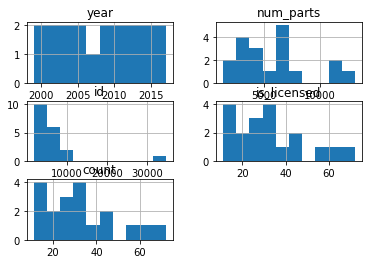

In [72]:
max_df.hist();